# **GROUP: 13 - Prediction of Bone Cancer Using Recursive Feature Elimination**
-------------------------------------------------------------------------------
### **SAYANG ELYIANA AMIERA BINTI HELMEY -- A20EC0143**
### **ROHAIZAAZIRA BINTI MOHD ZAWAWI -- A20EC0138**
### **NUR HAZNIRAH BINTI HAZMAN -- A20EC0114**
-------------------------------------------------------------------------------



# **Import Dataset**

Import pandas and numpy


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importing the data into Pandas

In [ ]:
df1 = pd.read_excel('/content/gdrive/MyDrive/ProgBio_Sem1 2023/BoneCancerRaw.xlsx')
df2 = pd.read_excel('/content/gdrive/MyDrive/ProgBio_Sem1 2023/BoneCancerConvert.xlsx')

In [ ]:
print(df1.shape)
print(df2.shape)

(1309, 6)
(1309, 4)


Merge the Dataset with Concat() and Droping the Columns

In [ ]:
frame = [df2, df1]
df = pd.concat(frame, axis=1)   #List of data Frames to concatenate and Axis = 1 is to concat by column
df_clean = df.drop(columns=['Probe ID', 'Species', 'Gene Name', 'ID', 'Gene Symbol'])   #Drop/remove the column
df_clean

,Entrez ID,GSM921514,GSM921515,GSM921516,GSM921517
0,780,10.678832,10.291389,9.608725,9.412715
1,5982,9.499689,8.981216,9.385408,9.868524
2,3310,5.848989,5.380187,5.566532,5.577159
3,7849,8.189986,8.431688,8.332415,8.084233
4,2978,3.519274,3.453561,4.207195,3.386633
...,...,...,...,...,...
1304,64866,4.679561,4.855678,6.055085,4.430294
1305,9706,5.666462,5.683198,6.081623,5.394488
1306,9498,5.589828,5.233311,7.455269,7.145090
1307,85464,6.190972,6.977493,5.725543,5.968132


Export Pandas DataFrames to an Excel File

In [ ]:
df_clean.to_excel("BoneCancerStandardize.xlsx", index=False)

Load the Exporting Data

In [ ]:
data = pd.read_excel("BoneCancerStandardize.xlsx")
data.head()

,Entrez ID,GSM921514,GSM921515,GSM921516,GSM921517
0,780,10.678832,10.291389,9.608725,9.412715
1,5982,9.499689,8.981216,9.385408,9.868524
2,3310,5.848989,5.380187,5.566532,5.577159
3,7849,8.189986,8.431688,8.332415,8.084233
4,2978,3.519274,3.453561,4.207195,3.386633


In [ ]:
data.shape

(1309, 5)

In [ ]:
data.columns

Index(['Entrez ID', 'GSM921514', 'GSM921515', 'GSM921516', 'GSM921517'], dtype='object')

View Data Type of each Column

In [ ]:
data.dtypes

Entrez ID      int64
GSM921514    float64
GSM921515    float64
GSM921516    float64
GSM921517    float64
dtype: object

Astype() method is to set/convert the data type of an existing data column

In [ ]:
data = data.astype({"Entrez ID": 'float64'})
data.dtypes

Entrez ID    float64
GSM921514    float64
GSM921515    float64
GSM921516    float64
GSM921517    float64
dtype: object

# **Data Wrangling (Pandas/Numpy)**

**1) Identifying and handling missing values**

In [ ]:
data.isnull().sum()

Entrez ID    0
GSM921514    0
GSM921515    0
GSM921516    0
GSM921517    0
dtype: int64

**2) Data Normalization**

In [ ]:
from sklearn import preprocessing

In [ ]:
x_array = np.array(data["GSM921514"])
normalized = preprocessing.normalize([x_array])
normalized

array([[0.0514499 , 0.04576887, 0.02818003, ..., 0.02693141, 0.02982769,
        0.02447285]])

In [ ]:
x_array = np.array(data["GSM921515"])
normalized = preprocessing.normalize([x_array])
normalized

array([[0.04977201, 0.04343565, 0.02602008, ..., 0.02530974, 0.03374509,
        0.02381724]])

In [ ]:
x_array = np.array(data["GSM921516"])
normalized = preprocessing.normalize([x_array])
normalized

array([[0.04600891, 0.04493961, 0.02665391, ..., 0.03569763, 0.02741529,
        0.02420414]])

In [ ]:
x_array = np.array(data["GSM921517"])
normalized = preprocessing.normalize([x_array])
normalized

array([[0.04511043, 0.04729489, 0.02672853, ..., 0.03424284, 0.02860227,
        0.02543023]])

# **Exploratory Data Analysis (Pandas Profiling)**

In [ ]:
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
eda = pd.read_excel('/content/BoneCancerStandardize.xlsx')

In [ ]:
eda.head()

,Entrez ID,GSM921514,GSM921515,GSM921516,GSM921517
0,780,10.678832,10.291389,9.608725,9.412715
1,5982,9.499689,8.981216,9.385408,9.868524
2,3310,5.848989,5.380187,5.566532,5.577159
3,7849,8.189986,8.431688,8.332415,8.084233
4,2978,3.519274,3.453561,4.207195,3.386633


**1) Descriptive Statistics**

In [ ]:
ds = eda[['GSM921516', 'GSM921517']]
ds

,GSM921516,GSM921517
0,9.608725,9.412715
1,9.385408,9.868524
2,5.566532,5.577159
3,8.332415,8.084233
4,4.207195,3.386633
...,...,...
1304,6.055085,4.430294
1305,6.081623,5.394488
1306,7.455269,7.145090
1307,5.725543,5.968132


In [ ]:
ds.sum()

GSM921516    7180.786895
GSM921517    7167.027734
dtype: float64

In [ ]:
ds.mean()

GSM921516    5.485704
GSM921517    5.475193
dtype: float64

In [ ]:
ds.std()

GSM921516    1.797152
GSM921517    1.812689
dtype: float64

In [ ]:
ds.describe()

,GSM921516,GSM921517
count,1309.000000,1309.000000
mean,5.485704,5.475193
std,1.797152,1.812689
min,2.760774,2.909036
25%,4.107926,4.070238
50%,5.115662,5.142274
75%,6.470932,6.451610
max,14.507109,14.677448


**2) Correlation**

In [ ]:
eda.corr()

,Entrez ID,GSM921514,GSM921515,GSM921516,GSM921517
Entrez ID,1.000000,0.012300,0.006066,0.007811,-0.000765
GSM921514,0.012300,1.000000,0.973638,0.880600,0.885823
GSM921515,0.006066,0.973638,1.000000,0.866896,0.874949
GSM921516,0.007811,0.880600,0.866896,1.000000,0.928779
GSM921517,-0.000765,0.885823,0.874949,0.928779,1.000000


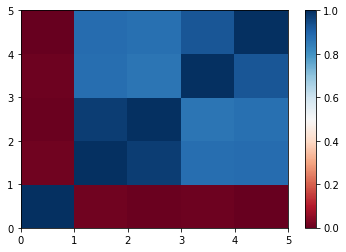

In [ ]:
plt.pcolor(eda.corr(), cmap = 'RdBu')
plt.colorbar()
plt.show()

In [ ]:
eda[['GSM921516', 'GSM921517']].corr()

,GSM921516,GSM921517
GSM921516,1.000000,0.928779
GSM921517,0.928779,1.000000


(0.0, 15.26873915968334)

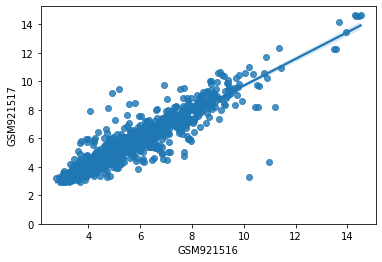

In [ ]:
sns.regplot(x='GSM921516', y='GSM921517', data=eda)
plt.ylim(0,)

In [ ]:
eda['GSM921516'].corr(data['GSM921517'])

0.9287789124071781

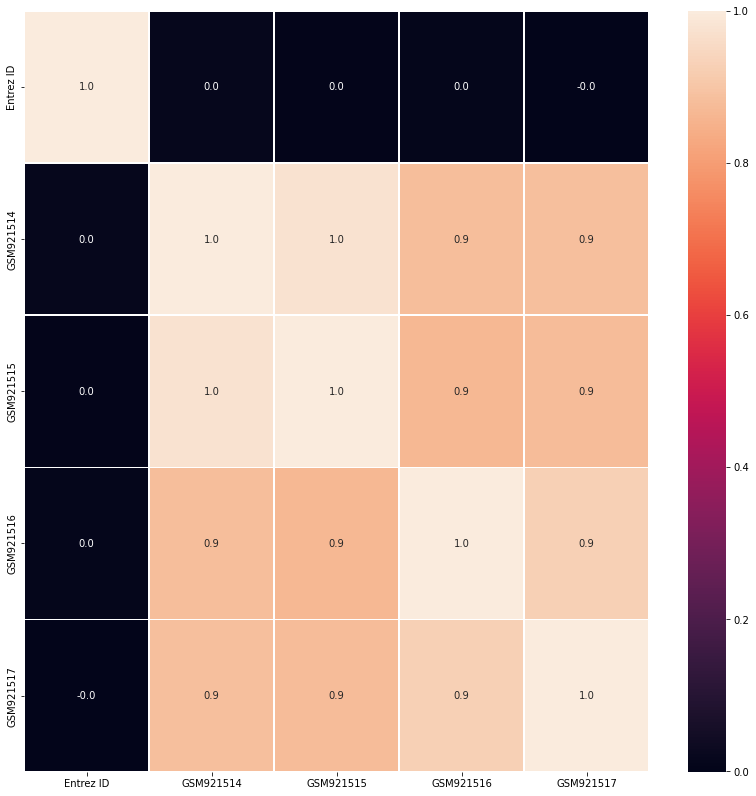

In [ ]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(eda.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# **Model Development (Pandas/Keras/TensorFlow/Matplotlib)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
from IPython.html import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [ ]:
df = pd.read_excel('/content/BoneCancerStandardize.xlsx')
df.head()

,Entrez ID,GSM921514,GSM921515,GSM921516,GSM921517
0,780,10.678832,10.291389,9.608725,9.412715
1,5982,9.499689,8.981216,9.385408,9.868524
2,3310,5.848989,5.380187,5.566532,5.577159
3,7849,8.189986,8.431688,8.332415,8.084233
4,2978,3.519274,3.453561,4.207195,3.386633


**1) Linear Regression and Multiple Regression**

Load the modules for linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

Create the linear regression object


In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
X = df[['GSM921516']]
Y = df['GSM921517']

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat = lm.predict(X)
Yhat[0:5]  

array([9.33767458, 9.12846881, 5.55091362, 8.14201576, 4.27747492])

In [ ]:
lm.intercept_

0.3361384257837745

In [ ]:
lm.coef_

array([0.93680855])

Multiple Linear Regression

In [ ]:
Z = df[['GSM921516', 'GSM921514', 'GSM921515']]

In [ ]:
lm.fit(Z, df['GSM921517'])

LinearRegression()

In [ ]:
lm.intercept_

0.14661621797295066

In [ ]:
lm.coef_

array([0.66294776, 0.19158146, 0.11963201])

**2) Model Evaluation using Visualization**

Regression Plot

In [ ]:
import seaborn as sns
%matplotlib inline 

(0.0, 15.268566306293264)

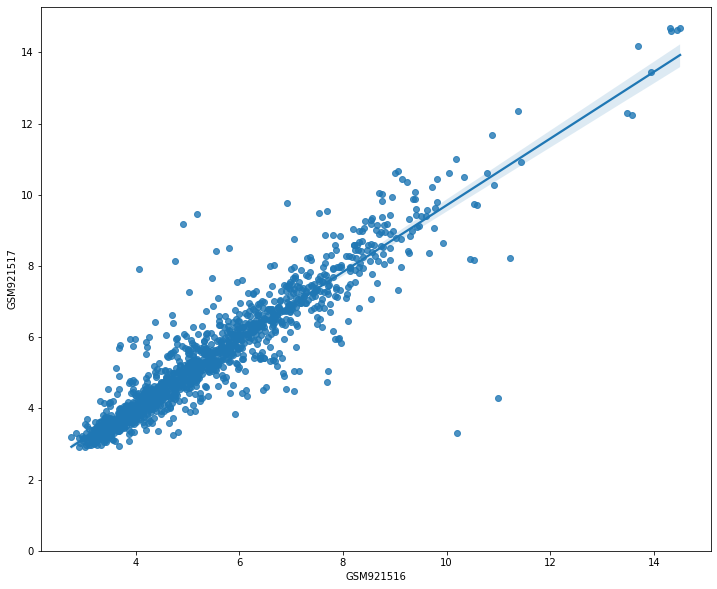

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="GSM921516", y="GSM921517", data=df)
plt.ylim(0,)

(0.0, 15.2658681742)

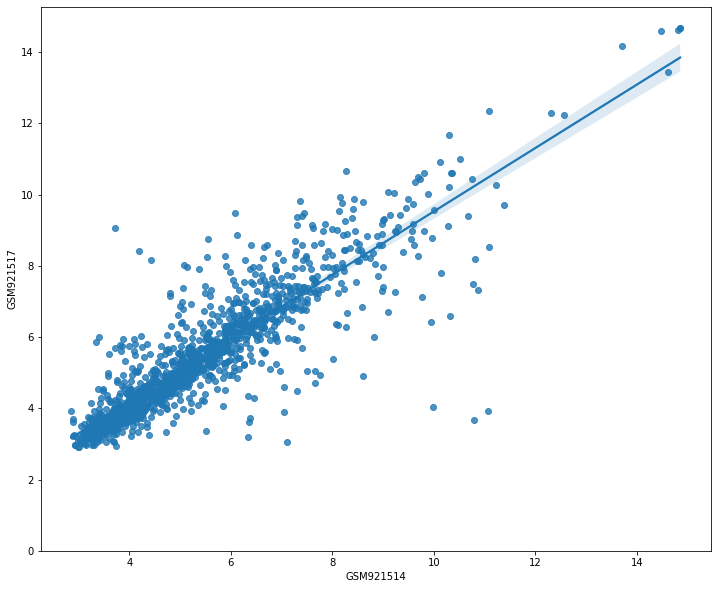

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x="GSM921514", y="GSM921517", data=df)
plt.ylim(0,)

In [ ]:
df[["GSM921516","GSM921514", "GSM921515","GSM921517"]].corr()

,GSM921516,GSM921514,GSM921515,GSM921517
GSM921516,1.000000,0.880600,0.866896,0.928779
GSM921514,0.880600,1.000000,0.973638,0.885823
GSM921515,0.866896,0.973638,1.000000,0.874949
GSM921517,0.928779,0.885823,0.874949,1.000000


Multiple Linear Regression

In [ ]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


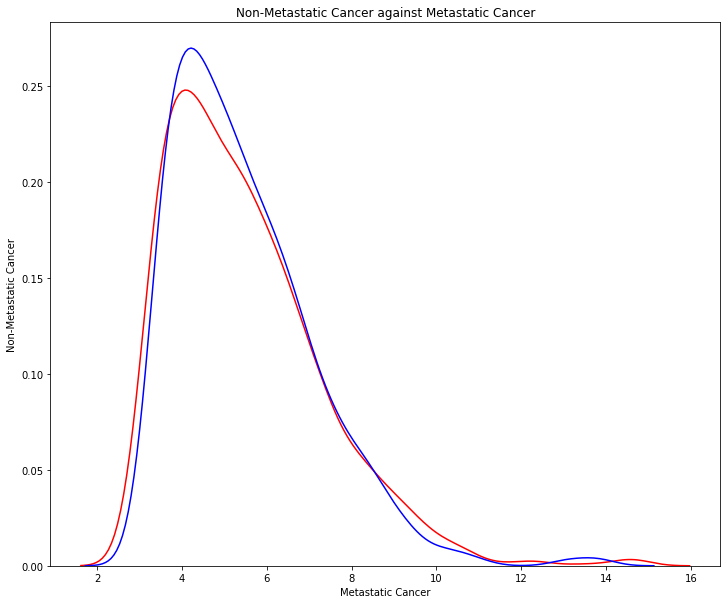

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['GSM921517'], hist=False, color="r", label="Metastatic Cancer")
sns.distplot(Yhat, hist=False, color="b", label="Non-metastatic cancer" , ax=ax1)


plt.title('Non-Metastatic Cancer against Metastatic Cancer')
plt.xlabel('Metastatic Cancer')
plt.ylabel('Non-Metastatic Cancer')

plt.show()
plt.close()

Residual Plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


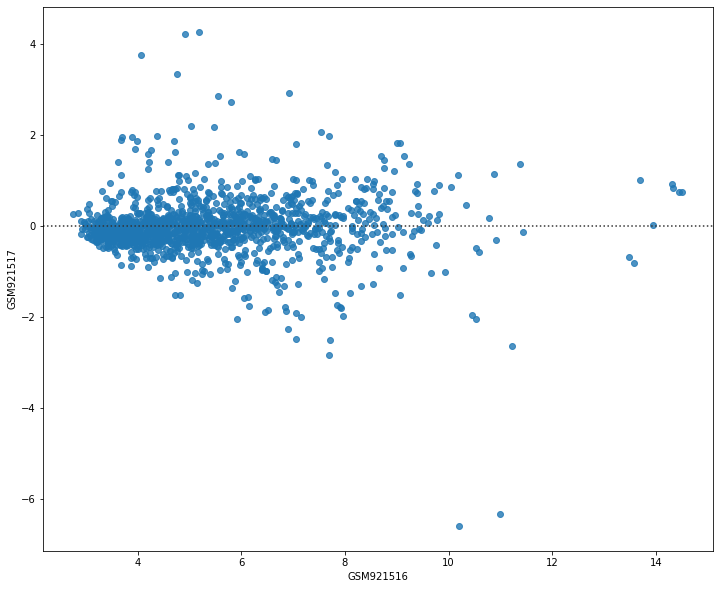

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['GSM921516'], df['GSM921517'])
plt.show()

**3) Measures for In-Sample Evaluation**

Model 1 - Simple Linear Regression

In [ ]:
# Calculate the R^2

# metastaticCancer_fit
lm.fit(X, Y)

# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.8626302681322598


In [ ]:
# Calculate the MSE

Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [9.33767458 9.12846881 5.55091362 8.14201576]


In [ ]:
# Import function mean_squared_error from the module metrics

from sklearn.metrics import mean_squared_error

# Compare the predicted results with the actual results

mse = mean_squared_error(df['GSM921517'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  0.4510304437108335


Model 2 - Multiple Linear Regression

In [ ]:
# Calculate the R^2

# fit the model 
lm.fit(Z, df['GSM921517'])

# Find the R^2
print('The R-square is: ', lm.score(Z, df['GSM921517']))

The R-square is:  0.8839266186596496


In [ ]:
# Calculate the MSE (produce prediction)

Y_predict_multifit = lm.predict(Z)

# Compare the predicted results with the actual results
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['GSM921517'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  0.3811074534189253


# **Model Evaluation**

Libraries for plotting

In [ ]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

Functions for plotting

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title('Non-metastatic cancer against metastatic cancer')
    plt.xlabel('Non-Metastatic cancer')
    plt.ylabel('Metastatic cancer')

    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(),xtest.values.max()])
    xmin=min([xtrain.values.min(),xtest.values.min()])
    x=np.arange(xmin,xmax,0.1)

    plt.plot(xtrain,y_train,'ro',label='Training Data')
    plt.plot(xtest,y_test,'go',label='Testing Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),
             label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('GSM921517')
    plt.legend()


**Training and Testing**

In [ ]:
y_data=df['GSM921517']

In [ ]:
# Drop the metastatic cancer data in x data

x_data=df.drop('GSM921517', axis=1)

In [ ]:
# Randomly split the data into training and testing data using the function train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)


print("Number of testing samples :", x_test.shape[0])
print("Number of training samples:", x_train.shape[0])


Number of testing samples : 393
Number of training samples: 916


Import LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

Create Linear Regression object

In [ ]:
lre=LinearRegression()

Fit the model using the feature 'Non-metastatic cancer'

In [ ]:
lre.fit(x_train[['GSM921516']], y_train)

LinearRegression()

Calculate and results of the R^2 on the test data

In [ ]:
lre.score(x_test[['GSM921516']],y_test)

0.859706122889874

In [ ]:
lre.score(x_train[['GSM921516']],y_train)

0.8634879528837804

**Cross-Validation Score**

In [ ]:
#import model_selection from the module cross_val_scor

from sklearn.model_selection import cross_val_score

In [ ]:
# input the object, the feature in this case 'GSM921516', the target data (y_data). 
# The parameter 'cv' determines the number of folds; in this case 4

Rcross=cross_val_score(lre,x_data[['GSM921516']], y_data,cv=4)
Rcross

array([0.7659025 , 0.83270058, 0.93209822, 0.86428472])

In [ ]:
# calculate the average and standard deviation of our estimate
print("The mean of the folds are", Rcross.mean(),"and the standard deviation is" ,Rcross.std())

The mean of the folds are 0.8487465041148338 and the standard deviation is 0.0598112574339704


In [ ]:
# can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'
-1*cross_val_score(lre,x_data[['GSM921516']], y_data,cv=4,scoring='neg_mean_squared_error')

array([0.70741659, 0.37021698, 0.2510404 , 0.50642868])

Use the function 'cross_val_predict' to predict the output

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
yhat = cross_val_predict(lre, x_data[['GSM921516']], y_data,cv=4)
yhat[0:5]

array([9.47447527, 9.25908404, 5.57575328, 8.24346508, 4.26466353])

**Ridge Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Perform a degree two polynomial transformation on our data

In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['GSM921516']])
x_test_pr=pr.fit_transform(x_test[['GSM921516']])

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['GSM921514', 'GSM921515', 'GSM921516']])
x_test_pr = pr.fit_transform(x_test[['GSM921514', 'GSM921515', 'GSM921516']])

Import Ridge from the module linear models

In [ ]:
from sklearn.linear_model import Ridge

Create a Ridge regression object, setting the regularization parameter to 0.1

In [ ]:
RigeModel=Ridge(alpha=0.1)

Fit the model using the method fit

In [ ]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

Prediction

In [ ]:
yhat = RigeModel.predict(x_test_pr)

In [ ]:
print('Predicted:', yhat[0:4])
print('Test set :', y_test[0:4].values)

Predicted: [4.28012916 5.26629586 8.70447125 4.87588322]
Test set : [3.97559076 5.15782376 7.80287469 4.15123879]


In [ ]:
from tqdm import tqdm

rsq_test = []
rsq_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    rsq_test.append(test_score)
    rsq_train.append(train_score)

100%|██████████| 1000/1000 [00:03<00:00, 252.89it/s, Test Score=0.846, Train Score=0.844]


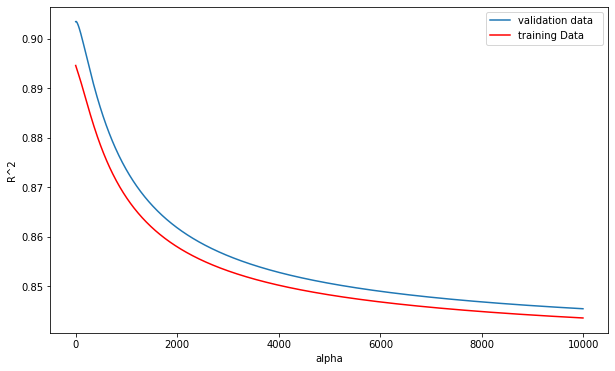

In [ ]:
# plot out the value of R^2 for different alphas
plt.figure(figsize=(10, 6))
plt.plot(Alpha,rsq_test, label='validation data  ')
plt.plot(Alpha,rsq_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()